# **Homework 2**

**1. Feedforward: Building a ReLU neural net- work**

1. Draw a network with:

 • 2 inputs

 • 1 hidden layers with 3 hidden units and a
 
 • 1-class output (for binary classification)

![graph.png](https://i.loli.net/2019/10/28/KeQCbIzyp59SYdD.png)

 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).
 
$$ \begin{array}{l}{X=\left[\begin{array}{ll}{x_{1},} & {x_{2}}\end{array}\right]} \\ {A=X W+b} \\ {H=\operatorname{Relu}(A)} \\ {Z=A V+C} \\ {Y{hat}=\operatorname{sigmoid} (Z)} \end{array} $$


3.   Write out the forward-pass function in python, call it ff nn ReLu(...)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def Relu(x):
    return np.maximum(0,x)

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s
  

def ff_nn_Relu(x, w, v, b, c):
    a = np.dot(x, w) + b
    h = Relu(a)
    z =np.dot(h, v) + c
    return sigmoid(z)
 

4. 
what are the class probabilities associated with the forward pass of each sample?

In [3]:
  
w = np.array([[1, -1, 0], [0, 0, 0.5]])
b = np.array([0, 0, 1])
v = np.array([[1], [0], [-1]])
c = np.array([1])
x1 = np.array([1, -1])
x2 = np.array([0, -1])
x3 = np.array([0, 1])
print("Class probabilities associated with the forward pass of each sample are:")
print(ff_nn_Relu(x1, w, v, b,c))
print(ff_nn_Relu(x2, w, v, b,c))
print(ff_nn_Relu(x3, w, v, b,c))

Class probabilities associated with the forward pass of each sample are:
[0.81757448]
[0.62245933]
[0.37754067]


**2 Gradient Descent**

Consider a simple non-convex function of two variables: 

            f(x,y)=(1−x3)+100∗(y2 −x)2
            
1. What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x} = -3x^2-200y^2-200x$

$\frac{\partial f}{\partial y} = 400y^3-400xy$

2. Create a visualization of the contours of the Rosenbrock function.

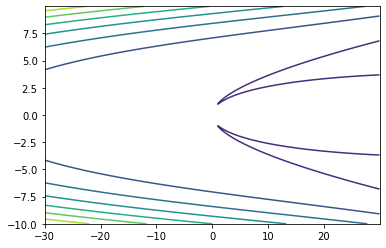

In [4]:
delta = 0.025
x = np.arange(-30, 30, delta)
y = np.arange(-10, 10, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3)+100*(Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

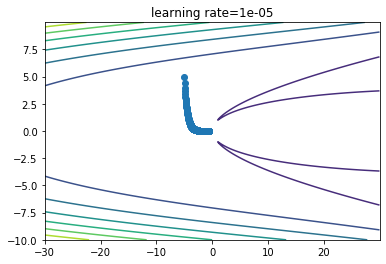

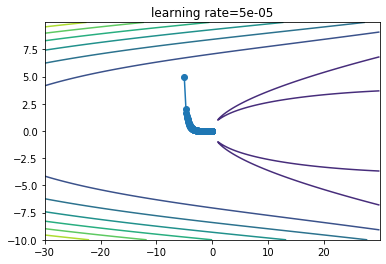

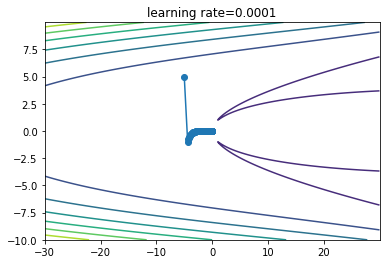

In [5]:
def grad_f(vec):
    x, y = vec
    df_dx = -3*x**2-200*(y**2-x)
    df_dy = 400*y*(y**2-x)
    return np.array([df_dx, df_dy])
  
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

lrs = [0.00001, 0.00005, 0.0001]
for lr in lrs:
    traj = grad_descent([-5, 5], 1000, lr)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.title('learning rate='+str(lr))
    plt.plot(x,y,'-o')



4. Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

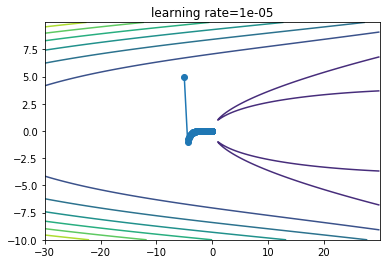

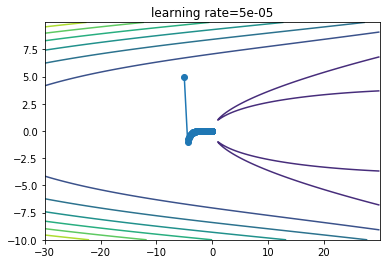

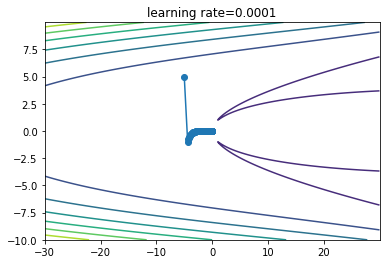

In [6]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):

    point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)
  
start = np.array([-5, 5])
for lr in lrs:
    traj = grad_descent_with_momentum(start, 1000, lr, 0.0001)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.title('learning rate='+str(lr))
    plt.plot(x,y,'-o')


**3 Backprop**

1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$$ \frac{\partial L}{\partial v_i} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial v_1} = (-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})h_i \\ \frac{\partial L}{\partial c} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial c}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y}) \\ \frac{\partial L}{\partial w_{ji}} =\frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial h_j}\frac{\partial h_j}{\partial w_{ji}} =(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_j x_i \\ \text{if $w_{j1}x_1+w_{j2}x_2+b_j >0$ , else $\frac{\partial L}{\partial w_{ji}}=0$} \\ \frac{\partial L}{\partial b_j} =\frac{\partial l}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial h_j}\frac{\partial h_j}{\partial b_j} =(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_j \\ \text{if $w_{j1}x_1+w_{j2}x_2+b_j >0$ , else $\frac{\partial L}{\partial b_j}=0$} \\ $$


2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [0]:
def loss(y, y_hat):
    return np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat), axis=0)[0]
def loss_dv(y,yhat):
    return -(y/yhat - (1-y)/(1-yhat))

def relu_dv(x):
    return np.where(x>0, 1, 0)

def sigmoid_dv(x):
    return sigmoid(x)*(1-sigmoid(x))

def forward(x, w, v, b, c):
    hin = x.dot(w)+b
    hout = Relu(hin)   
    z = hout.dot(v)+c
    yhat = sigmoid(z)  
    return hin,hout,z,yhat
  
def grad_f(w, v, b, c, x, y):
    hin,hout,z,yhat = forward(x,w,v,b,c)
    dc = loss_dv(y,yhat)*sigmoid_dv(z)
    dv = loss_dv(y,yhat)*sigmoid_dv(z) * hout.T
    db = loss_dv(y,yhat)*sigmoid_dv(z) * v.T * (hin > 0)
    dw = x.T.dot(loss_dv(y,yhat)*sigmoid_dv(z) * v.T * (hin > 0))
    return dw,db,dv,dc
  

3. Generate a synthetic dataset like the XOR pattern .

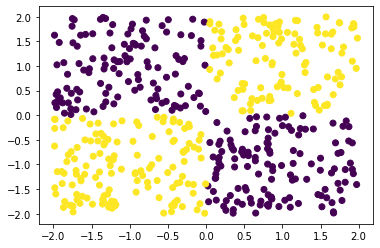

In [56]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)


4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

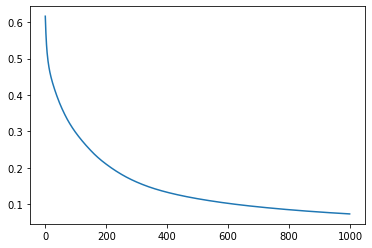

In [73]:
n = 500
np.random.seed(10)
w = np.random.randn(6).reshape((2,3))
b = np.random.randn(3).reshape((1,3))
v = np.random.randn(3).reshape((3,1))
c = np.random.randn(1)
ww = w
bb = b
vv = v
cc = c
x = x.reshape((n,1,2))
y = y.reshape((n,1))

def GradientDescent(x, y, w, b, v, c, iterations, lr):
    all_loss = []
    for i in range(iterations):
        total_loss = 0
        
        for j in range(len(y)):
            dw,db,dv,dc = grad_f(w, v, b, c, x[j], y[j])
            w = w - lr*dw
            b = b - lr*db
            v = v - lr*dv
            c = c - lr*dc
            hin,hout,z,out = forward(x[j], w, v, b, c)
            loss_j = loss(y[j],out)
            total_loss+=loss_j

        all_loss.append(total_loss/len(y))
    return all_loss

losses = GradientDescent(x, y, w, b, v, c,1000,0.0005)
plt.plot(np.arange(1000),losses)


5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.


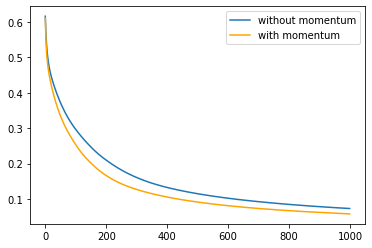

In [76]:

def GradientDescent_Momentum(x, y, w, b, v, c, iterations, alpha, epsilon):
    all_loss = []
    yhats = [[0] for _ in range(len(y))]
    params = []
    params.append(w)
    params.append(b)
    params.append(v)
    params.append(c)

    for i in range(iterations):
        total_loss = 0
        w0 = np.zeros((2,3))
        b0 = np.zeros((1,3))
        v0 = np.zeros((3,1))
        c0 = np.zeros((1,1))
 
        yhat = 0
        for j in range(len(y)):
            dw,db,dv,dc = grad_f(w, v, b, c, x[j], y[j])
            w0 = alpha * w0 + epsilon*dw
            b0 = alpha * b0 + epsilon*db
            v0 = alpha * v0 + epsilon*dv
            c0 = alpha * c0 + epsilon*dc
            w = w- w0
            b = b - b0
            v = v - v0
            c = c - c0
            hin,hout,z,yhat = forward(x[j], w, v, b, c)
            loss_j = loss(y[j],yhat)
            if yhat >= 0:
               yhats[j] = yhat
               params[0] = w
               params[1] = b
               params[2] = v
               params[3] = c
            total_loss+=loss_j
        all_loss.append(total_loss/len(y))
        #print(yhats)
    #print(len(yhats))
    return (params,yhats, all_loss)
  
final_params, predicts, losses_Momentum = GradientDescent_Momentum(x, y, ww, bb, vv, cc, 1000, 0.3, 0.0005)
plt.plot(np.arange(1000),losses,label='without momentum')
#print(predicts)
plt.plot(np.arange(1000),losses_Momentum,label='with momentum', color = 'orange')
plt.legend()


From the plot above, it's clear that Gradient Descent with momengtum converge more efficiently 

6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

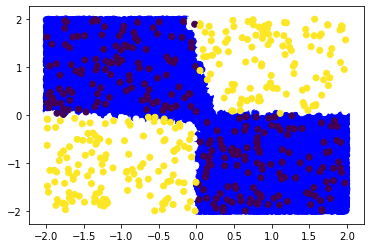

In [77]:
#draw the final decision boundary
x_ = np.random.uniform(low=-2,high=2,size=100000).reshape((50000,2))
y_=np.zeros(50000)
y_[np.logical_and(x_[:,0]>0 , x_[:,1]>0)]=1
y_[np.logical_and(x_[:,0]<0 , x_[:,1]<0)]=1
y_= y_.reshape((50000,1))
_, _, _, preds = forward(x_, final_params[0], final_params[2], final_params[1], final_params[3])
colors = [[''] for i in range(len(preds))]
for i in range(len(preds)):
    if preds[i] > 0.5:
       colors[i] = 'white'
    else:
       colors[i] = 'blue'
plt.scatter(x_[:,0],x_[:,1],c=colors)   

#draw the data points
x = x.reshape(500, 2)
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y) 